In [5]:
import torch
import sys
import os
sys.path.insert(0, '../src/lightweight_gan')
try:
    from src.lightweight_gan.model import init_GAN
    from src.lightweight_gan.utils import image_to_pil
except:
    from ..src.lightweight_gan.model import init_GAN
    from ..src.lightweight_gan.utils import image_to_pil
# path = os.path.abspath(os.path.join("/Users/prerana/Documents/personal/LightweightGAN/notebooks", "../src"))
# sys.path.insert(0, path)

# from model import  init_GAN

In [6]:
latent_dim = 256
attn_res_layers = []
freq_chan_attn = False
image_size = 512
fmap_max = 512
disc_output_size = 1
transparent = False
greyscale = False



In [9]:
GAN = init_GAN(
    latent_dim = latent_dim,
    attn_res_layers = attn_res_layers,
    freq_chan_attn = freq_chan_attn,
    image_size = image_size,
    fmap_max = fmap_max,
    disc_output_size = disc_output_size,
    transparent = transparent,
    greyscale = greyscale,
)
model = torch.load('../src/lightweight_gan/models/model_23.0.pt', map_location=torch.device('cpu'))
GAN.load_state_dict(model['GAN'])
GAN.G.eval()

Generator(
  (initial_conv): Sequential(
    (0): ConvTranspose2d(256, 512, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): GLU(dim=1)
  )
  (layers): ModuleList(
    (0): ModuleList(
      (0): Sequential(
        (0): PixelShuffleUpsample(
          (net): Sequential(
            (0): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1))
            (1): SiLU()
            (2): PixelShuffle(upscale_factor=2)
          )
        )
        (1): Blur()
        (2): Sequential(
          (0): ZeroPad2d((2, 1, 2, 1))
          (1): Conv2d(256, 1024, kernel_size=(4, 4), stride=(1, 1))
        )
        (3): Noise()
        (4): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): GLU(dim=1)
      )
      (1-2): 2 x None
    )
    (1): ModuleList(
      (0): Sequential(
        (0): PixelShuffleUpsample(
          (net): Sequential(
            (0): Conv2d(512, 2048

In [22]:
with torch.no_grad():
    latents = torch.randn(1, latent_dim)
    generated_images = GAN.G(latents)
# fid_score = calculate_fid_given_images(generated_images, image_batch, self.batch_size, "cuda")
pil_generated_images = [image_to_pil(image) for image in generated_images]

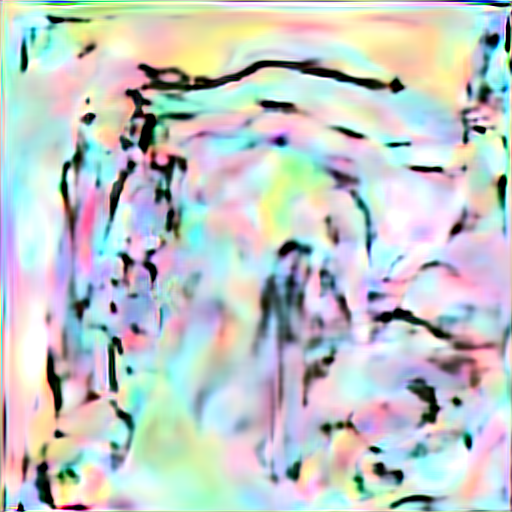

In [23]:
pil_generated_images[0]
